In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dt = pd.read_csv('gdp.csv')
dt["tertiary_industry_share"] = dt["tertiary_industry_share"].fillna(dt["tertiary_industry_share"].median())
dt["internet_usage_rate"] = dt["internet_usage_rate"].fillna(dt["internet_usage_rate"].median())

#.values→Numpy配列に変換
X = dt.iloc[:, 1:-1].values
y = dt.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

"""
SVMは全体を一本の境界線で分けるのに対し、ナイーブベイズは先進国が多く集まる領域だけを確率的に切り出すような分類になり、
特徴量の独立性を仮定することでクラス1が「島」のような局所的な範囲として表現されやすくなった結果、SVMよりもかなり保守的
で1と判定されにくいモデルになり、同じデータでもモデルの仮定の違いによって境界の形や世界の切り取り方が大きく変わることを実感した。

"""

[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[36  4]
 [ 1  9]]


0.9

/tmp/ipython-input-577387568.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


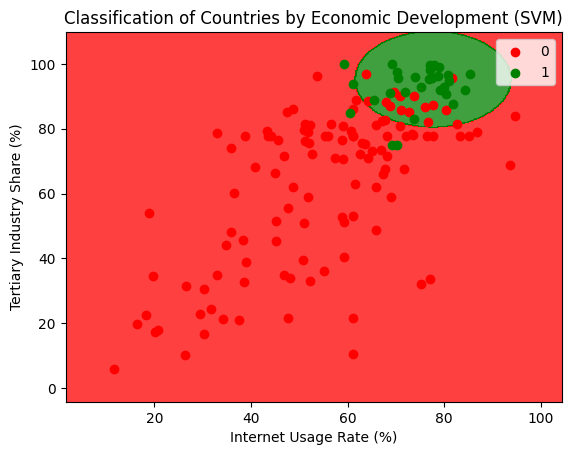

In [ ]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 10, stop = X_train[:, 0].max() + 10, step = 0.25),
 np.arange(start = X_train[:, 1].min() - 10, stop = X_train[:, 1].max() + 10, step = 0.25))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification of Countries by Economic Development (SVM)')
plt.xlabel('Internet Usage Rate (%)')
plt.ylabel('Tertiary Industry Share (%)')

plt.legend()
plt.show()

/tmp/ipython-input-434231751.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


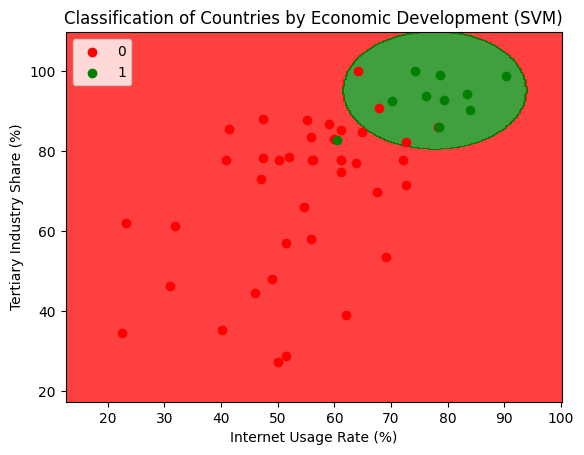

In [ ]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 10, stop = X_test[:, 0].max() + 10, step = 0.25),
 np.arange(start = X_test[:, 1].min() - 10, stop = X_test[:, 1].max() + 10, step = 0.25))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Classification of Countries by Economic Development (SVM)')
plt.xlabel('Internet Usage Rate (%)')
plt.ylabel('Tertiary Industry Share (%)')
plt.legend()
plt.show()